In [1470]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns
import sys
from sklearn import linear_model, neighbors
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

from scipy.stats import ttest_1samp
import researchpy as rp
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols


In [1471]:
dataG = pd.read_csv("/Users/lijiayi/Desktop/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001)000000.csv")#Find file path
print("-------------------------------------------")
print(dataG)

-------------------------------------------
       Arrest_Year Arrest_Month  EventID   ArrestID  PersonID  \
0             2020    July-Sept  1005907  6017884.0    326622   
1             2020    July-Sept  1014562  6056669.0    326622   
2             2020      Oct-Dec  1029922  6057065.0    326622   
3             2021      Jan-Mar  1052190  6029059.0    327535   
4             2021      Jan-Mar  1015512  6040372.0    327535   
...            ...          ...      ...        ...       ...   
65271         2021      Oct-Dec  1055609  6044336.0    316123   
65272         2021      Oct-Dec  1032758  6031692.0    307736   
65273         2021      Oct-Dec  1021067  6064396.0    324057   
65274         2021      Oct-Dec  1008998  6008662.0    331870   
65275         2021      Oct-Dec  1033395  6032145.0    310583   

          Perceived_Race Sex    Age_group__at_arrest_  \
0                  White   M      Aged 35 to 44 years   
1                  White   M      Aged 35 to 44 years   
2   

In [1472]:
#Describe data
dataG.describe()


,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
count,65276.000000,6.527600e+04,6.480700e+04,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,65276.000000
mean,2020.510096,1.029998e+06,6.032402e+06,318599.919695,0.119508,0.519502,0.004075,0.044136,0.038330,0.033381,0.006358,0.445937,0.765671,0.343161,0.453403,0.418921,0.373157,32638.500000
std,0.499902,1.731809e+04,1.870751e+04,10815.387928,0.324388,0.499623,0.063706,0.205398,0.191992,0.179632,0.079481,0.497072,0.423606,0.474795,0.497856,0.493414,0.483674,18843.702423
min,2020.000000,1.000000e+06,6.000000e+06,300000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2020.000000,1.015001e+06,6.016202e+06,309215.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16319.750000
50%,2021.000000,1.030006e+06,6.032402e+06,318595.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32638.500000
75%,2021.000000,1.044996e+06,6.048602e+06,327926.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48957.250000
max,2021.000000,1.060002e+06,6.064804e+06,337346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000


In [1473]:
dataG.describe(include = 'object')

,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,Occurrence_Category
count,65276,65272,65276,65252,65276,65276,65111
unique,4,8,3,9,3,18,31
top,Jan-Mar,White,M,Aged 25 to 34 years,Not a youth,XX,Assault
freq,17613,27723,52650,20949,62234,29646,7726


In [1474]:
df = dataG.fillna('Unknown',inplace=True)
print(df)

None


In [1475]:
e = dataG
c = e.isnull().sum()
print(c)

Arrest_Year                        0
Arrest_Month                       0
EventID                            0
ArrestID                           0
PersonID                           0
Perceived_Race                     0
Sex                                0
Age_group__at_arrest_              0
Youth_at_arrest__under_18_years    0
ArrestLocDiv                       0
StripSearch                        0
Booked                             0
Occurrence_Category                0
Actions_at_arrest___Concealed_i    0
Actions_at_arrest___Combative__    0
Actions_at_arrest___Resisted__d    0
Actions_at_arrest___Mental_inst    0
Actions_at_arrest___Assaulted_o    0
Actions_at_arrest___Cooperative    0
SearchReason_CauseInjury           0
SearchReason_AssistEscape          0
SearchReason_PossessWeapons        0
SearchReason_PossessEvidence       0
ItemsFound                         0
ObjectId                           0
dtype: int64


In [1476]:
col = dataG['PersonID']
counts = col.value_counts()
a = dataG.insert(7,"cc","counts")
print(a)


None


In [1477]:
col_9= dataG['Perceived_Race']
counts_9 = col_9.value_counts()
print(counts_9)

White                   27723
Black                   17526
Unknown or Legacy        5056
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1768
Unknown                     4
Name: Perceived_Race, dtype: int64


/var/folders/vv/wd3z4vz53611q89t7q1j0cwh0000gn/T/ipykernel_13791/1224120748.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataG.corr(),annot=True,cmap='Blues_r')


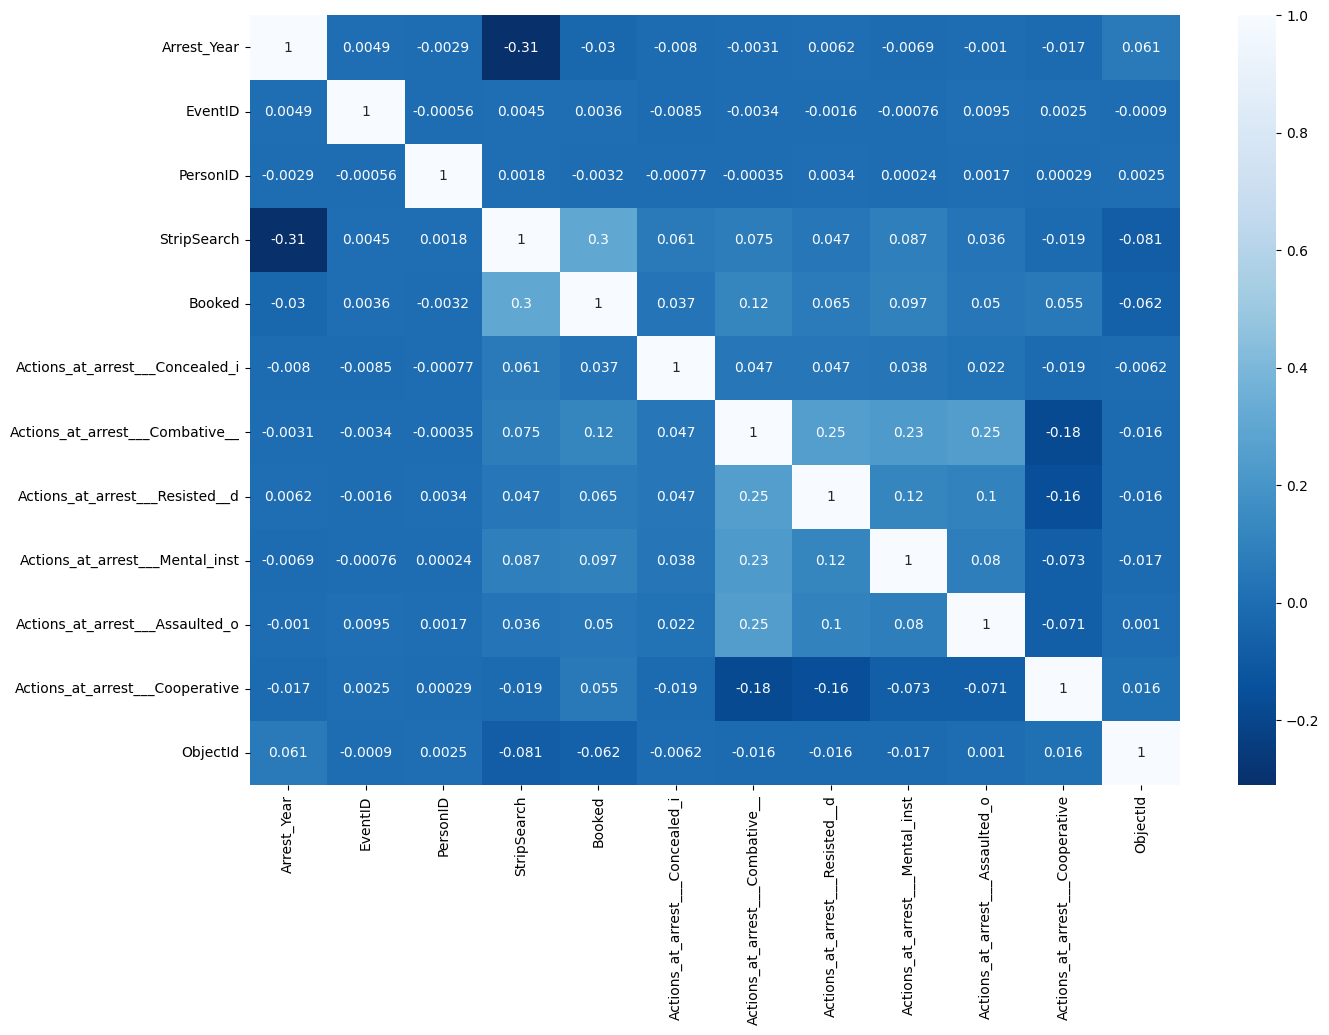

In [1478]:
plt.figure(figsize=(15,10))
sns.heatmap(dataG.corr(),annot=True,cmap='Blues_r')
plt.show()

In [1479]:

dataG.loc[dataG.Sex == 'M', 'Sex'] = 1
dataG.loc[dataG.Sex == 'F', 'Sex'] = 2
dataG.loc[dataG.Sex == 'U', 'Sex'] = 3

In [1480]:
mean_sex = dataG["Sex"].mean()
print(mean_sex)

std_sex = dataG["Sex"].std()
print(std_sex)

1.1935627183038175
0.3954419554933452


In [1481]:
dataG.loc[dataG.Perceived_Race == 'White', 'Perceived_Race'] = 1
dataG.loc[dataG.Perceived_Race == 'Black', 'Perceived_Race'] = 2
dataG.loc[dataG.Perceived_Race == 'South Asian', 'Perceived_Race'] = 3

dataG.loc[dataG.Perceived_Race == 'Indigenous', 'Perceived_Race'] = 4
dataG.loc[dataG.Perceived_Race == 'Middle-Eastern', 'Perceived_Race'] = 5
dataG.loc[dataG.Perceived_Race == 'Unknown or Legacy', 'Perceived_Race'] = 6

dataG.loc[dataG.Perceived_Race == 'Latino', 'Perceived_Race'] = 7
dataG.loc[dataG.Perceived_Race == 'East/Southeast Asian', 'Perceived_Race'] = 8

dataG.loc[dataG.Perceived_Race == 'Unknown', 'Perceived_Race'] = 9


In [1482]:

mean_Perceived_Race = dataG["Perceived_Race"].mean()
print(mean_Perceived_Race)

std_Perceived_Race = dataG["Perceived_Race"].std()
print(std_Perceived_Race)

2.690161774618543
2.218768594792442


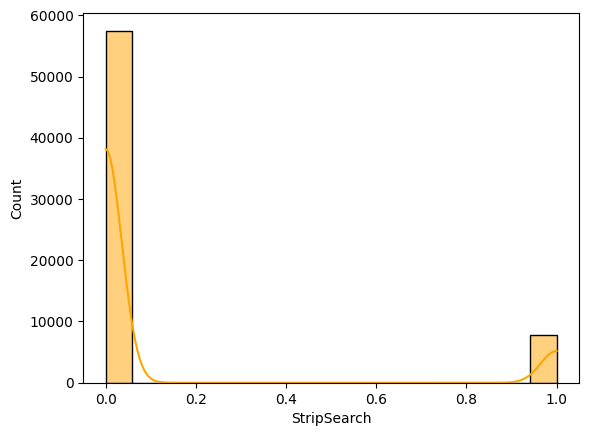

In [1483]:
sns.histplot(dataG['StripSearch'], kde=True, color='orange')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

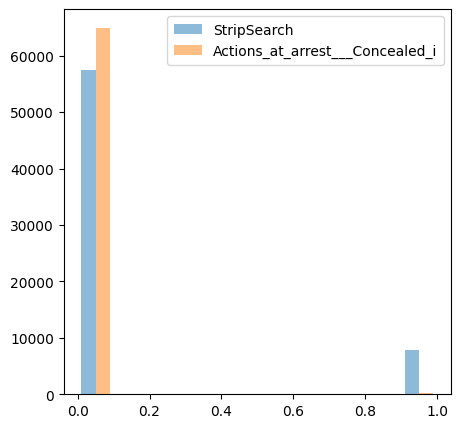

In [1484]:
x1 =dataG['StripSearch']
x2 = dataG['Actions_at_arrest___Concealed_i']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['StripSearch','Actions_at_arrest___Concealed_i'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

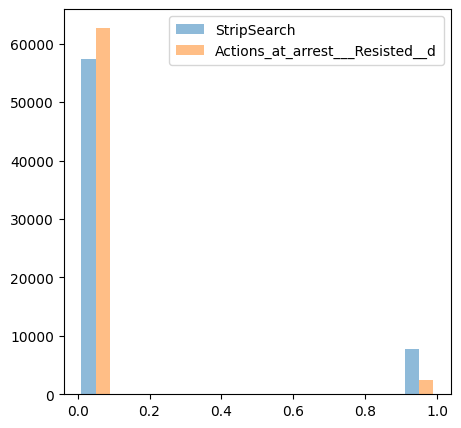

In [1485]:
x1 =dataG['StripSearch']
x2 = dataG['Actions_at_arrest___Resisted__d']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['StripSearch','Actions_at_arrest___Resisted__d'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

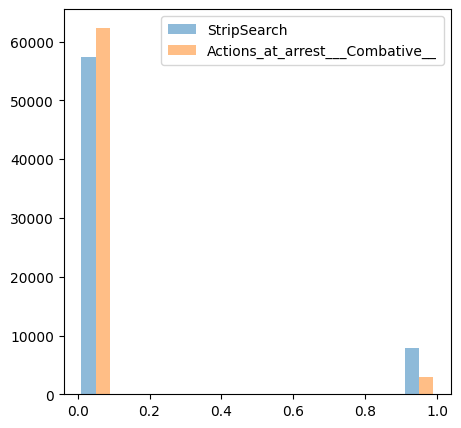

In [1486]:
x1 =dataG['StripSearch']
x2 = dataG['Actions_at_arrest___Combative__']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['StripSearch','Actions_at_arrest___Combative__'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

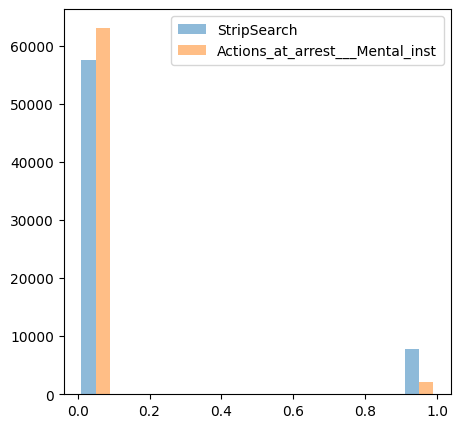

In [1487]:
x1 =dataG['StripSearch']
x2 = dataG['Actions_at_arrest___Mental_inst']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['StripSearch','Actions_at_arrest___Mental_inst'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

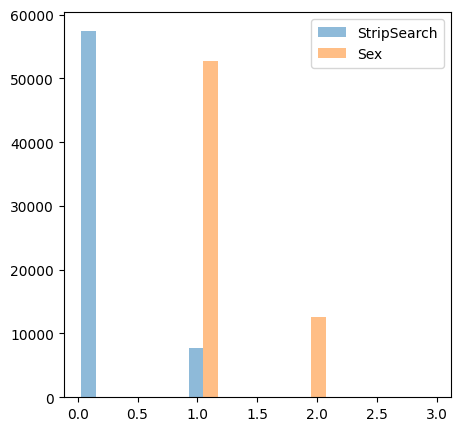

In [1488]:
x1 =dataG['StripSearch']
x2 = dataG['Sex']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['StripSearch','Sex'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

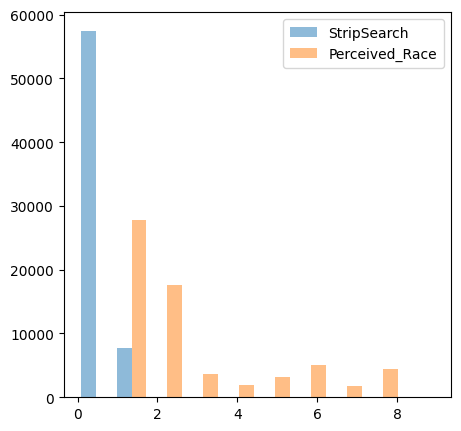

In [1489]:
x1 =dataG['StripSearch']
x2 = dataG['Perceived_Race']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['StripSearch','Perceived_Race'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

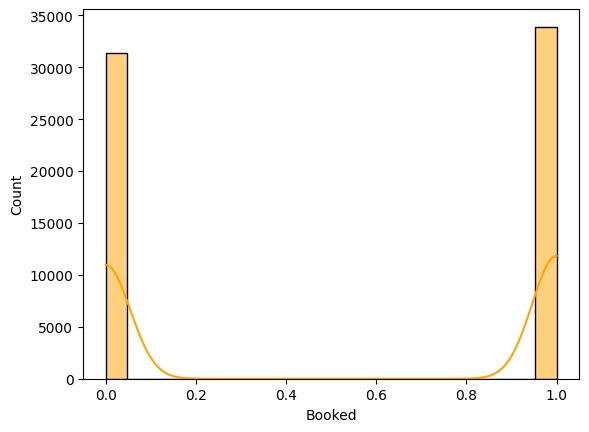

In [1490]:
sns.histplot(dataG['Booked'], kde=True, color='orange')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

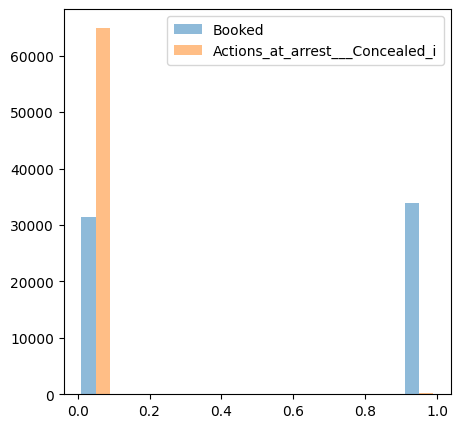

In [1491]:
x1 =dataG['Booked']
x2 = dataG['Actions_at_arrest___Concealed_i']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['Booked','Actions_at_arrest___Concealed_i'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

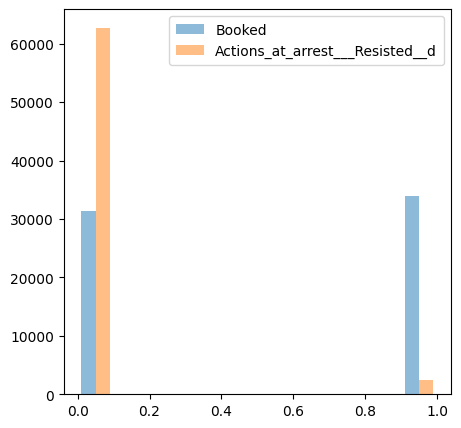

In [1492]:
x1 =dataG['Booked']
x2 = dataG['Actions_at_arrest___Resisted__d']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['Booked','Actions_at_arrest___Resisted__d'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

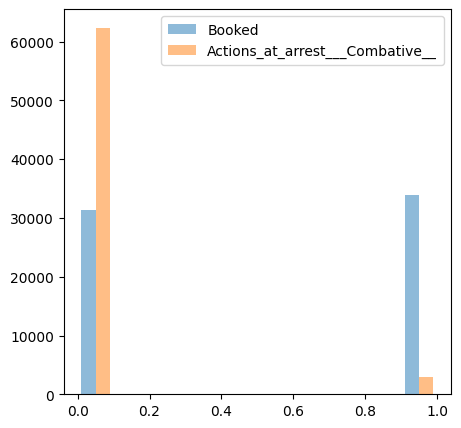

In [1493]:
x1 =dataG['Booked']
x2 = dataG['Actions_at_arrest___Combative__']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['Booked','Actions_at_arrest___Combative__'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

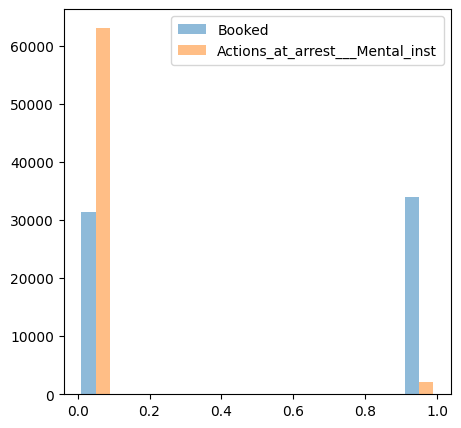

In [1494]:
x1 =dataG['Booked']
x2 = dataG['Actions_at_arrest___Mental_inst']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['Booked','Actions_at_arrest___Mental_inst'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

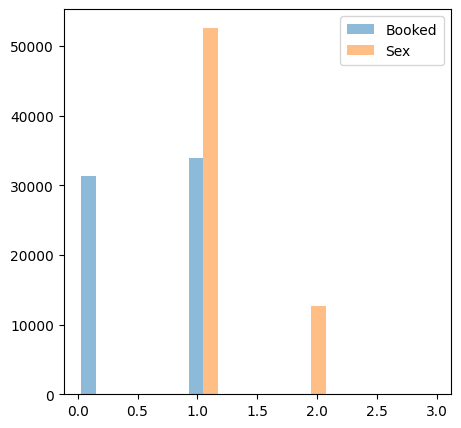

In [1495]:
x1 =dataG['Booked']
x2 = dataG['Sex']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['Booked','Sex'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

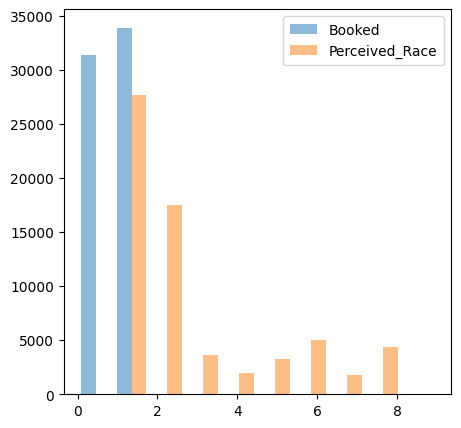

In [1496]:
x1 =dataG['Booked']
x2 = dataG['Perceived_Race']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['Booked','Perceived_Race'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

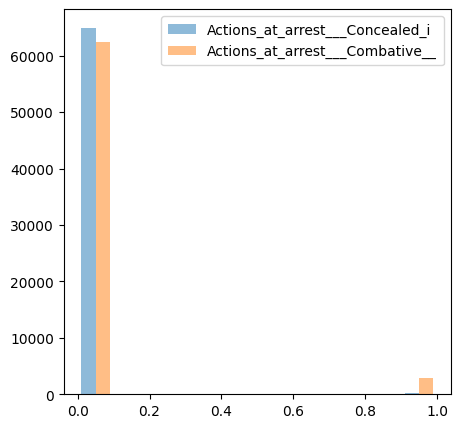

In [1497]:
x1 =dataG['Actions_at_arrest___Concealed_i']
x2 = dataG['Actions_at_arrest___Combative__']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

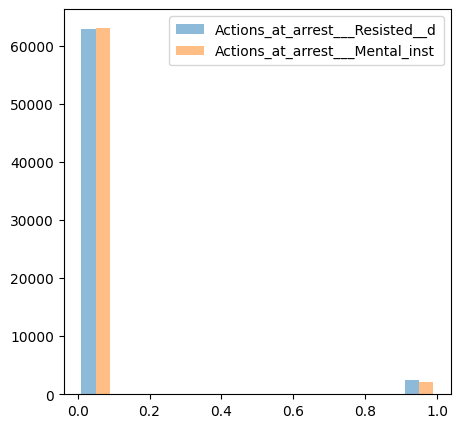

In [1498]:
x1 =dataG['Actions_at_arrest___Resisted__d']
x2 = dataG['Actions_at_arrest___Mental_inst']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['Actions_at_arrest___Resisted__d','Actions_at_arrest___Mental_inst'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

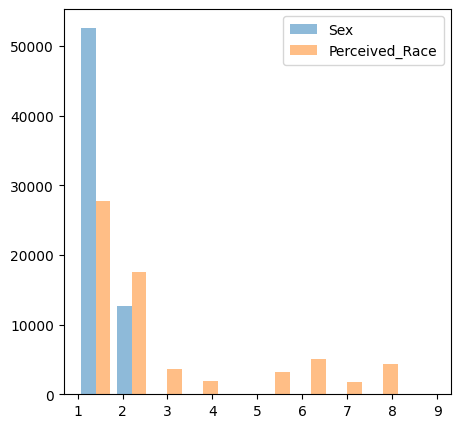

In [1499]:
x1 =dataG['Sex']
x2 = dataG['Perceived_Race']
plt.figure(figsize=(5,5))
plt.hist([x1,x2],label = ['Sex','Perceived_Race'],bins =10,alpha =0.5)
plt.legend(borderpad = 0.5, fontsize = 10)
plt.show

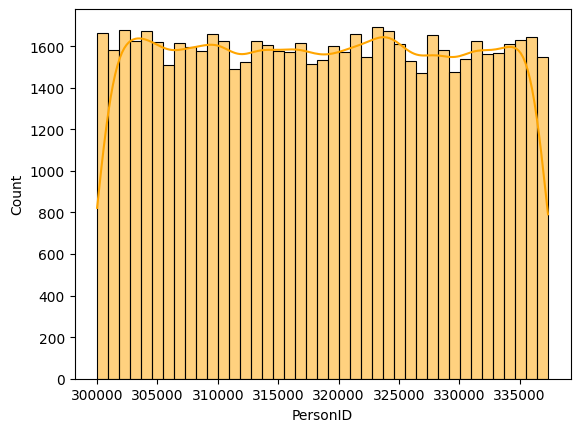

In [1500]:
sns.histplot(dataG['PersonID'], kde=True, color='orange')
plt.show()

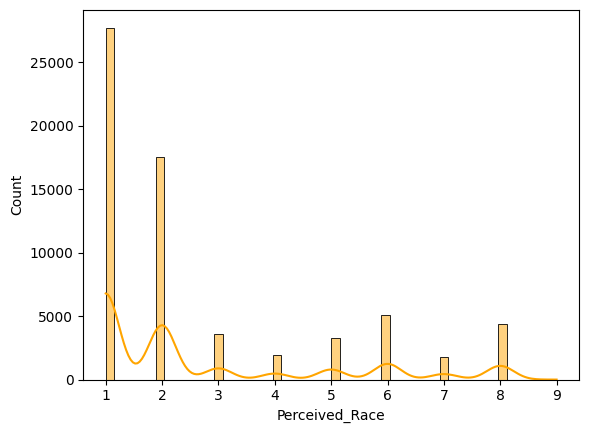

In [1501]:
sns.histplot(dataG['Perceived_Race'], kde=True, color='orange')
plt.show()

In [1502]:
#one sample t test
mean_booked = dataG["Booked"].mean()
print(mean_booked)

0.5195018077088057


In [1503]:
#one sample t test
t_stat, p_val = ttest_1samp(dataG['Booked'],mean_booked)
print(t_stat)
print(p_val)


0.0
1.0


In [1504]:
#one sample t test
mean_Actions_at_arrest___Concealed_i = dataG["Actions_at_arrest___Concealed_i"].mean()
print(mean_Actions_at_arrest___Concealed_i)

0.004075004595869845


In [1505]:
#one sample t test
t_stat, p_val = ttest_1samp(dataG['Actions_at_arrest___Concealed_i'],mean_Actions_at_arrest___Concealed_i)
print(t_stat)
print(p_val)

0.0
1.0


In [1506]:
#one sample t test
mean_Actions_at_arrest___Combative__ = dataG["Actions_at_arrest___Combative__"].mean()
print(mean_Actions_at_arrest___Combative__)

0.044135670077823395


In [1507]:
#one sample t test
t_stat, p_val = ttest_1samp(dataG['Actions_at_arrest___Combative__'],mean_Actions_at_arrest___Combative__)
print(t_stat)
print(p_val)

0.0
1.0


In [1508]:
#one sample t test
mean_Actions_at_arrest___Resisted__d = dataG["Actions_at_arrest___Resisted__d"].mean()
print(mean_Actions_at_arrest___Resisted__d)

0.03832955450701636


In [1509]:
#one sample t test
t_stat, p_val = ttest_1samp(dataG['Actions_at_arrest___Resisted__d'],mean_Actions_at_arrest___Resisted__d)
print(t_stat)
print(p_val)

0.0
1.0


In [1510]:
#one sample t test
mean_Actions_at_arrest___Mental_inst = dataG["Actions_at_arrest___Mental_inst"].mean()
print(mean_Actions_at_arrest___Mental_inst)
t_stat, p_val = ttest_1samp(dataG['Actions_at_arrest___Mental_inst'],mean_Actions_at_arrest___Mental_inst)
print(t_stat)
print(p_val)

0.03338133464060298
0.0
1.0


In [1511]:
#anova
model = ols('Booked ~ Actions_at_arrest___Concealed_i + Actions_at_arrest___Combative__+ Actions_at_arrest___Concealed_i:Actions_at_arrest___Combative__', data=dataG).fit()

In [1512]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                                                          sum_sq       df  \
Actions_at_arrest___Concealed_i                        16.219802      1.0   
Actions_at_arrest___Combative__                       212.229609      1.0   
Actions_at_arrest___Concealed_i:Actions_at_arre...      1.818976      1.0   
Residual                                            16057.853791  65272.0   

                                                             F         PR(>F)  
Actions_at_arrest___Concealed_i                      65.930288   4.752328e-16  
Actions_at_arrest___Combative__                     862.671390  2.171501e-188  
Actions_at_arrest___Concealed_i:Actions_at_arre...    7.393779   6.546714e-03  
Residual                                                   NaN            NaN  


In [1513]:
mc = MultiComparison(dataG['Booked'], dataG['Actions_at_arrest___Concealed_i'])
tukey_result = mc.tukeyhsd()

print(tukey_result)
mc = MultiComparison(dataG['Booked'], dataG['Actions_at_arrest___Combative__'])
tukey_result = mc.tukeyhsd()

print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1     0.29   0.0 0.2298 0.3501   True
-------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper  reject
------------------------------------------------
     0      1   0.2815   0.0 0.263 0.3001   True
------------------------------------------------


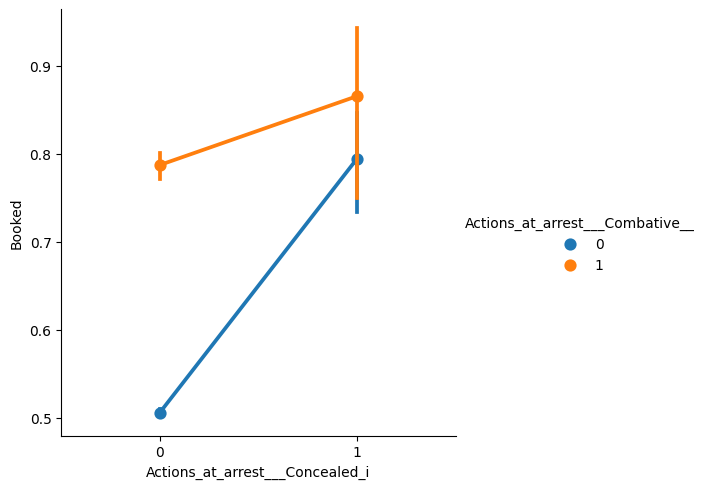

In [1514]:
sns.catplot(x="Actions_at_arrest___Concealed_i", y="Booked", hue="Actions_at_arrest___Combative__", data=dataG, kind="point")
plt.show()

In [1515]:
#anova

model_01 = ols('Booked ~ Actions_at_arrest___Resisted__d+ Actions_at_arrest___Mental_inst+ Actions_at_arrest___Resisted__d: Actions_at_arrest___Mental_inst', data=dataG).fit()

In [1516]:
#anova
anova_table_01 = sm.stats.anova_lm(model_01, typ=2)
print(anova_table_01)

                                                          sum_sq       df  \
Actions_at_arrest___Resisted__d                        46.911246      1.0   
Actions_at_arrest___Mental_inst                       132.184341      1.0   
Actions_at_arrest___Resisted__d:Actions_at_arre...     12.740447      1.0   
Residual                                            16081.345785  65272.0   

                                                             F         PR(>F)  
Actions_at_arrest___Resisted__d                     190.406380   2.981586e-43  
Actions_at_arrest___Mental_inst                     536.518301  3.242314e-118  
Actions_at_arrest___Resisted__d:Actions_at_arre...   51.711747   6.496391e-13  
Residual                                                   NaN            NaN  


In [1517]:
mc = MultiComparison(dataG['Booked'], dataG['Actions_at_arrest___Resisted__d'])
tukey_result = mc.tukeyhsd()

print(tukey_result)
mc = MultiComparison(dataG['Booked'], dataG['Actions_at_arrest___Mental_inst'])
tukey_result = mc.tukeyhsd()

print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1    0.168   0.0 0.1481 0.1879   True
-------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   0.2697   0.0 0.2484 0.2909   True
-------------------------------------------------


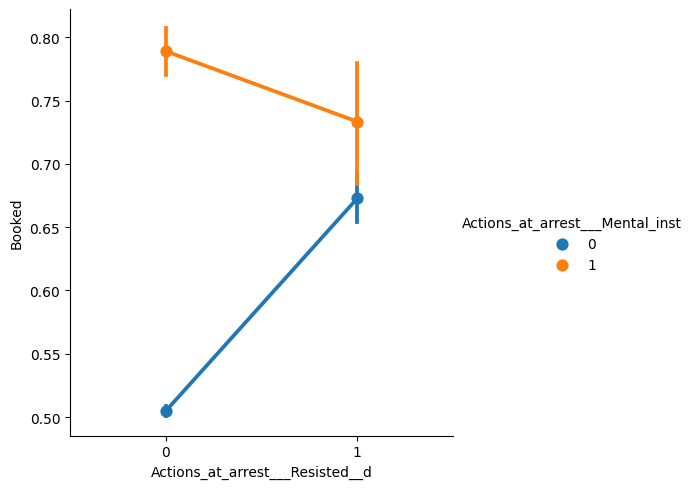

In [1518]:
sns.catplot(x="Actions_at_arrest___Resisted__d", y="Booked", hue="Actions_at_arrest___Mental_inst", data=dataG, kind="point")
plt.show()

In [1519]:
#anova
model_02 = ols('Booked~ Sex+ Perceived_Race+ Sex: Perceived_Race', data=dataG).fit()

In [1520]:
#anova
anova_table_02 = sm.stats.anova_lm(model_02, typ=2)
print(anova_table_02)

                          sum_sq       df           F         PR(>F)
Sex                   226.794188      2.0  458.966628  1.807776e-101
Perceived_Race         69.734564      8.0   35.280708   1.747468e-29
Sex:Perceived_Race     21.966070     16.0    5.556631   2.496561e-08
Residual            16122.582625  65255.0         NaN            NaN


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 10
  warnings.warn('covariance of constraints does not have full '


In [1521]:
mc = MultiComparison(dataG['Booked'], dataG['Sex'])
tukey_result = mc.tukeyhsd()

print(tukey_result)
mc = MultiComparison(dataG['Booked'], dataG['Perceived_Race'])
tukey_result = mc.tukeyhsd()

print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.1044    0.0  -0.116 -0.0929   True
     1      3  -0.3175  0.135 -0.7065  0.0715  False
     2      3  -0.2131 0.4046 -0.6022  0.1761  False
----------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.0375    0.0  0.0226  0.0524   True
     1      3  -0.0225 0.2065 -0.0499  0.0048  False
     1      4    0.041 0.0143  0.0045  0.0774   True
     1      5  -0.0102 0.9743  -0.039  0.0185  False
     1      6  -0.0324 0.0007  -0.056 -0.0087   True
     1      7   0.0314 0.1999 -0.0065  0.0694  False
     1      8  -0.0401    0.0 -0.0652  -0.015   True
     1      9  -0.5144    0.5 -1.2883  0.2596  False
     2      3    -0.06    0.0 -0.0883 -0.0318 

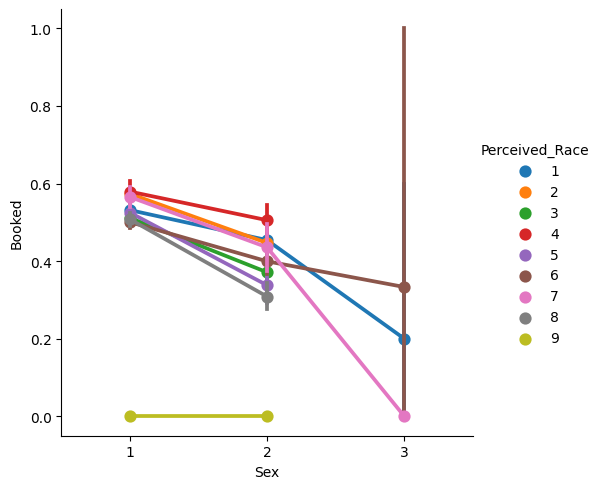

In [1522]:
sns.catplot(x="Sex", y="Booked", hue="Perceived_Race", data=dataG, kind="point")
plt.show()

In [1523]:
#anova
model_03 = ols('Booked ~ Sex+ PersonID+ Sex: PersonID', data=dataG).fit()

In [1524]:
#anova
anova_table_03 = sm.stats.anova_lm(model_03, typ=2)
print(anova_table_03)

                    sum_sq       df           F        PR(>F)
Sex             111.810375      2.0  225.494016  2.546672e-98
PersonID          0.140856      1.0    0.568144  4.509999e-01
Sex:PersonID      0.257584      2.0    0.519483  5.948303e-01
Residual      16181.944188  65270.0         NaN           NaN


In [1525]:
#anova
model_04 = ols('StripSearch ~ Actions_at_arrest___Concealed_i + Actions_at_arrest___Combative__+ Actions_at_arrest___Concealed_i:Actions_at_arrest___Combative__', data=dataG).fit()
anova_table_04 = sm.stats.anova_lm(model_04, typ=2)
print(anova_table_04)

                                                         sum_sq       df  \
Actions_at_arrest___Concealed_i                       22.675936      1.0   
Actions_at_arrest___Combative__                       36.158425      1.0   
Actions_at_arrest___Concealed_i:Actions_at_arre...     0.898695      1.0   
Residual                                            6806.149128  65272.0   

                                                             F        PR(>F)  
Actions_at_arrest___Concealed_i                     217.465654  3.876273e-49  
Actions_at_arrest___Combative__                     346.764767  3.405080e-77  
Actions_at_arrest___Concealed_i:Actions_at_arre...    8.618619  3.328600e-03  
Residual                                                   NaN           NaN  


In [1526]:
mc = MultiComparison(dataG['StripSearch'], dataG['Actions_at_arrest___Concealed_i'])
tukey_result = mc.tukeyhsd()

print(tukey_result)
mc = MultiComparison(dataG['StripSearch'], dataG['Actions_at_arrest___Combative__'])
tukey_result = mc.tukeyhsd()

print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   0.3103   0.0 0.2713 0.3493   True
-------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1    0.119   0.0 0.1069 0.1311   True
-------------------------------------------------


<Figure size 500x500 with 0 Axes>

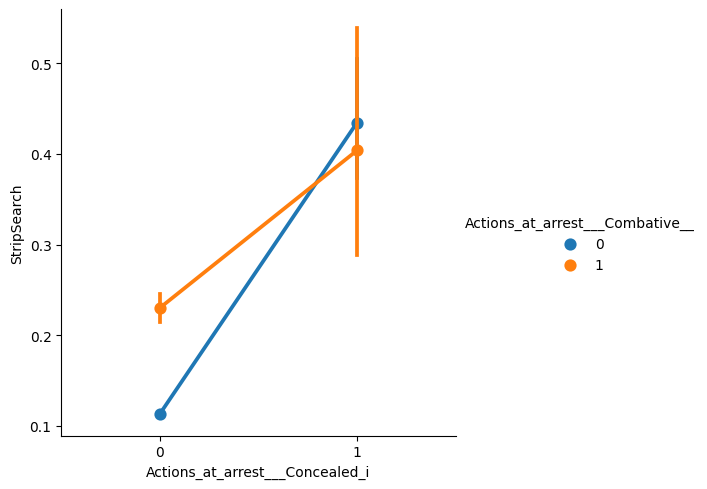

In [1527]:
# create interaction plot
plt.figure(figsize=(5,5))
sns.catplot(x="Actions_at_arrest___Concealed_i", y="StripSearch", hue="Actions_at_arrest___Combative__", data=dataG, kind="point")
plt.show()

In [1528]:
#anova
model_05 = ols('StripSearch ~ Actions_at_arrest___Resisted__d+ Actions_at_arrest___Mental_inst+ Actions_at_arrest___Resisted__d: Actions_at_arrest___Mental_inst', data=dataG).fit()
anova_table_05 = sm.stats.anova_lm(model_05, typ=2)
print(anova_table_05)

                                                         sum_sq       df  \
Actions_at_arrest___Resisted__d                        9.695427      1.0   
Actions_at_arrest___Mental_inst                       46.734205      1.0   
Actions_at_arrest___Resisted__d:Actions_at_arre...     2.157291      1.0   
Residual                                            6804.347447  65272.0   

                                                             F        PR(>F)  
Actions_at_arrest___Resisted__d                      93.005232  5.394970e-22  
Actions_at_arrest___Mental_inst                     448.306771  3.638156e-99  
Actions_at_arrest___Resisted__d:Actions_at_arre...   20.694222  5.397518e-06  
Residual                                                   NaN           NaN  


In [1529]:
mc = MultiComparison(dataG['StripSearch'], dataG['Actions_at_arrest___Resisted__d'])
tukey_result = mc.tukeyhsd()

print(tukey_result)
mc = MultiComparison(dataG['StripSearch'], dataG['Actions_at_arrest___Mental_inst'])
tukey_result = mc.tukeyhsd()

print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   0.0802   0.0 0.0673 0.0932   True
-------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   0.1579   0.0 0.1441 0.1717   True
-------------------------------------------------


<Figure size 500x500 with 0 Axes>

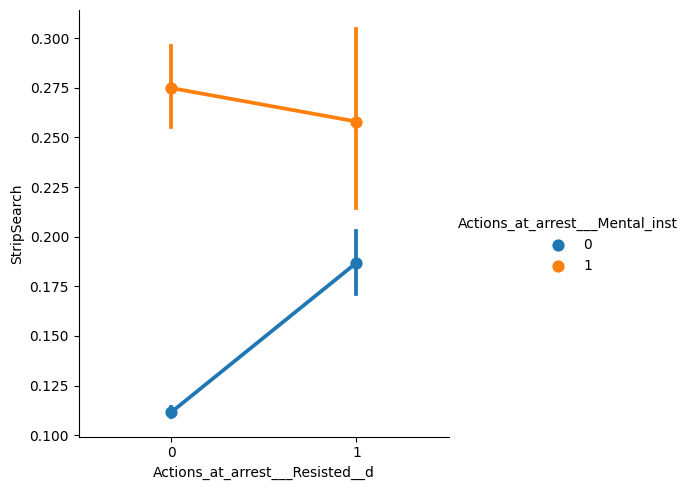

In [1530]:
plt.figure(figsize=(5,5))
sns.catplot(x="Actions_at_arrest___Resisted__d", y="StripSearch", hue="Actions_at_arrest___Mental_inst", data=dataG, kind="point")
plt.show()

In [1531]:
#anova
model_06 = ols('StripSearch ~  Sex+ Perceived_Race+ Sex: Perceived_Race', data=dataG).fit()
anova_table_06 = sm.stats.anova_lm(model_06, typ=2)
print(anova_table_06)

                         sum_sq       df          F        PR(>F)
Sex                   13.986577      2.0  66.979249  2.792757e-16
Perceived_Race        45.443662      8.0  54.405421  7.275917e-46
Sex:Perceived_Race    12.577049     16.0   7.528659  4.257606e-12
Residual            6813.259837  65255.0        NaN           NaN


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 10
  warnings.warn('covariance of constraints does not have full '


In [1532]:
mc = MultiComparison(dataG['StripSearch'], dataG['Sex'])
tukey_result = mc.tukeyhsd()

print(tukey_result)
mc = MultiComparison(dataG['StripSearch'], dataG['Perceived_Race'])
tukey_result = mc.tukeyhsd()

print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.0221    0.0 -0.0296 -0.0146   True
     1      3  -0.1238 0.4862 -0.3772  0.1296  False
     2      3  -0.1017 0.6147 -0.3551  0.1517  False
----------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.0102 0.0285  0.0006  0.0199   True
     1      3  -0.0575    0.0 -0.0752 -0.0398   True
     1      4   0.0296 0.0032   0.006  0.0532   True
     1      5  -0.0582    0.0 -0.0768 -0.0396   True
     1      6  -0.0226 0.0002  -0.038 -0.0073   True
     1      7   -0.054    0.0 -0.0786 -0.0294   True
     1      8  -0.0514    0.0 -0.0677 -0.0351   True
     1      9   0.1214  0.998 -0.3803  0.6231  False
     2      3  -0.0677    0.0 -0.0861 -0.0494 

<Figure size 500x500 with 0 Axes>

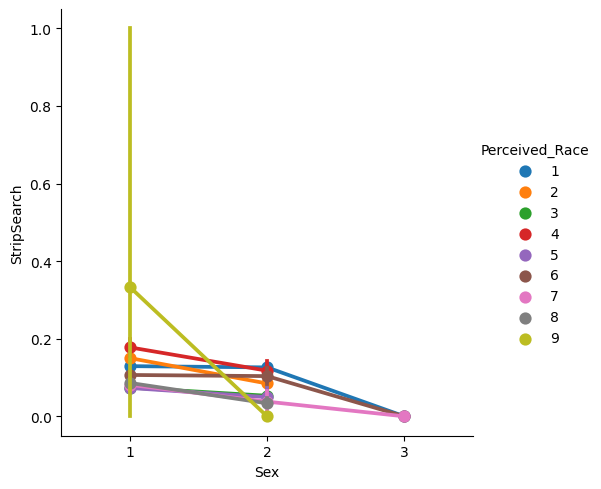

In [1533]:
plt.figure(figsize=(5,5))
sns.catplot(x="Sex", y="StripSearch", hue="Perceived_Race", data=dataG, kind="point")
plt.show()

In [1534]:
#anova
model_07 = ols('StripSearch ~  Sex+ Booked+ Sex: Booked', data=dataG).fit()
anova_table_07 = sm.stats.anova_lm(model_07, typ=2)
print(anova_table_07)

                 sum_sq       df            F    PR(>F)
Sex            0.065511      2.0     0.342124  0.710261
Booked       614.158206      1.0  6414.771014  0.000000
Sex:Booked     0.424610      2.0     2.217486  0.108891
Residual    6249.031492  65270.0          NaN       NaN


In [1535]:
mc = MultiComparison(dataG['StripSearch'], dataG['Sex'])
tukey_result = mc.tukeyhsd()

print(tukey_result)
mc = MultiComparison(dataG['StripSearch'], dataG['Booked'])
tukey_result = mc.tukeyhsd()

print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.0221    0.0 -0.0296 -0.0146   True
     1      3  -0.1238 0.4862 -0.3772  0.1296  False
     2      3  -0.1017 0.6147 -0.3551  0.1517  False
----------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   0.1949   0.0 0.1902 0.1997   True
-------------------------------------------------


<Figure size 500x500 with 0 Axes>

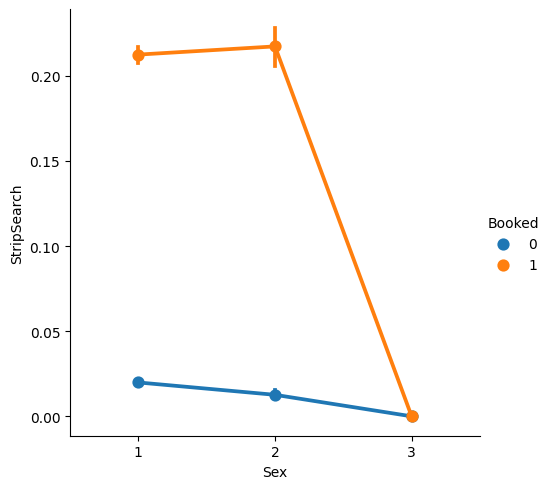

In [1536]:
plt.figure(figsize=(5,5))
sns.catplot(x="Sex", y="StripSearch", hue="Booked", data=dataG, kind="point")
plt.show()

In [1537]:
# two sample t test Based on two Y
group_a=dataG[dataG['Booked'] == 0]['StripSearch']
group_b=dataG[dataG['Booked']== 1]['StripSearch']
t_stat, p_val = ttest_ind(group_a, group_b)
print(t_stat)
print(p_val)
group_a=dataG[dataG['StripSearch'] == 0]['Booked']
group_b=dataG[dataG['StripSearch']== 1]['Booked']
t_stat, p_val = ttest_ind(group_a, group_b)
print(t_stat)
print(p_val)

-80.41945804370819
0.0
-80.4194580437082
0.0


In [1538]:
#two sample t test
group3_1=dataG[dataG['Actions_at_arrest___Mental_inst'] == 0]['StripSearch']
group4_1=dataG[dataG['Actions_at_arrest___Mental_inst']== 1]['StripSearch']
t_stat, p_val = ttest_ind(group3_1, group4_1)
print(t_stat)
print(p_val)

-22.42615467008337
5.756867710060993e-111


In [1539]:
#two sample t test
group7=dataG[dataG['Actions_at_arrest___Combative__'] == 0]['StripSearch']
group8=dataG[dataG['Actions_at_arrest___Combative__']== 1]['StripSearch']

In [1540]:
#two sample t test
t_stat, p_val = ttest_ind(group7, group8)
print(t_stat)
print(p_val)

-19.305101902877688
8.290039188934905e-83


In [1541]:
#two sample t test
group9=dataG[dataG['Actions_at_arrest___Resisted__d'] == 0]['StripSearch']
group10=dataG[dataG['Actions_at_arrest___Resisted__d']== 1]['StripSearch']

In [1542]:
#two sample t test
t_stat, p_val = ttest_ind(group9, group10)
print(t_stat)
print(p_val)

-12.14235071240765
6.852716690955235e-34


In [1543]:
#two sample t test
group11=dataG[dataG['Actions_at_arrest___Concealed_i'] == 0]['StripSearch']
group12=dataG[dataG['Actions_at_arrest___Concealed_i']== 1]['StripSearch']

In [1544]:
#two sample t test
t_stat, p_val = ttest_ind(group11, group12)
print(t_stat)
print(p_val)

-15.599673537099743
9.191399072028645e-55


In [1545]:
#two sample t test
group11_1=dataG[dataG['Sex'] == 1]['StripSearch']
group12_1=dataG[dataG['Sex']== 2]['StripSearch']
group12_1_1 = dataG[dataG['Sex']== 3]['StripSearch']

In [1546]:
#two sample t test
t_stat, p_val = ttest_ind(group11_1, group12_1)
print(t_stat)
print(p_val)

6.878475003915285
6.1039305439141965e-12


In [1547]:
#two sample t test
t_stat, p_val = ttest_ind(group11_1, group12_1_1)
print(t_stat)
print(p_val)

1.1276362889725497
0.2594786924739137


In [1548]:
#two sample t test
t_stat, p_val = ttest_ind(group12_1, group12_1_1)
print(t_stat)
print(p_val)

1.0092728233762753
0.3128631539314948


In [1549]:
#two sample t test
group13_1=dataG[dataG['Perceived_Race'] == 1]['StripSearch']
group14_1=dataG[dataG['Perceived_Race']== 2]['StripSearch']
group15_1 = dataG[dataG['Perceived_Race']== 3]['StripSearch']
group16_1=dataG[dataG['Perceived_Race'] == 4]['StripSearch']
group17_1=dataG[dataG['Perceived_Race']== 5]['StripSearch']
group18_1 = dataG[dataG['Perceived_Race']== 6]['StripSearch']
group19_1=dataG[dataG['Perceived_Race'] == 7]['StripSearch']
group20_1=dataG[dataG['Perceived_Race']== 8]['StripSearch']
group21_1 = dataG[dataG['Perceived_Race']== 9]['StripSearch']

In [1550]:
#two sample t test
t_stat, p_val = ttest_ind(group13_1, group14_1)
print(t_stat)
print(p_val)

-3.1320279316335236
0.0017371398920229028


In [1551]:
#two sample t test
t_stat, p_val = ttest_ind(group13_1, group15_1)
print(t_stat)
print(p_val)

9.94776630106247
2.792578423891952e-23


In [1552]:
#two sample t test
t_stat, p_val = ttest_ind(group13_1, group16_1)
print(t_stat)
print(p_val)

-3.7352297553793568
0.00018789499535262148


In [1553]:
#two sample t test
t_stat, p_val = ttest_ind(group13_1, group17_1)
print(t_stat)
print(p_val)

9.568334579415962
1.164052970432168e-21


In [1554]:
#two sample t test
t_stat, p_val = ttest_ind(group13_1, group18_1)
print(t_stat)
print(p_val)

4.471064581752621
7.809206380978744e-06


In [1555]:
#two sample t test
t_stat, p_val = ttest_ind(group13_1, group19_1)
print(t_stat)
print(p_val)

6.648546378845182
3.011640952965667e-11


In [1556]:
#two sample t test
t_stat, p_val = ttest_ind(group13_1, group20_1)
print(t_stat)
print(p_val)

9.719358295257091
2.676274994949316e-22


In [1557]:
#two sample t test
t_stat, p_val = ttest_ind(group13_1, group21_1)
print(t_stat)
print(p_val)

-0.7249408268651991
0.4684944509111302


In [1558]:
#two sample t test
t_stat, p_val = ttest_ind(group14_1, group15_1)
print(t_stat)
print(p_val)

11.156626344607513
8.000948132483773e-29


In [1559]:
#two sample t test
t_stat, p_val = ttest_ind(group14_1, group15_1)
print(t_stat)
print(p_val)

11.156626344607513
8.000948132483773e-29


In [1560]:
#two sample t test
t_stat, p_val = ttest_ind(group14_1, group15_1)
print(t_stat)
print(p_val)

11.156626344607513
8.000948132483773e-29


In [1561]:
#two sample t test
t_stat, p_val = ttest_ind(group14_1, group16_1)
print(t_stat)
print(p_val)

-2.3210532306546816
0.020294250888617093


In [1562]:
#two sample t test
t_stat, p_val = ttest_ind(group14_1, group17_1)
print(t_stat)
print(p_val)

10.730417450270894
8.613258773630027e-27


In [1563]:
#two sample t test
t_stat, p_val = ttest_ind(group14_1, group18_1)
print(t_stat)
print(p_val)

6.096509484431073
1.101680686001579e-09


In [1564]:
#two sample t test
t_stat, p_val = ttest_ind(group14_1, group19_1)
print(t_stat)
print(p_val)

7.589795404268061
3.3495626456279174e-14


In [1565]:
#two sample t test
t_stat, p_val = ttest_ind(group14_1, group20_1)
print(t_stat)
print(p_val)

11.043411381820977
2.8007137752123774e-28


In [1566]:
#two sample t test
t_stat, p_val = ttest_ind(group14_1, group21_1)
print(t_stat)
print(p_val)

-0.6424973091543034
0.5205587393372844


In [1567]:
#two sample t test
t_stat, p_val = ttest_ind(group15_1, group17_1)
print(t_stat)
print(p_val)

0.1121754859796021
0.9106875536218013


In [1568]:
#two sample t test
t_stat, p_val = ttest_ind(group15_1, group18_1)
print(t_stat)
print(p_val)

-5.563408370070555
2.7242942377107306e-08


In [1569]:
#two sample t test
t_stat, p_val = ttest_ind(group15_1, group19_1)
print(t_stat)
print(p_val)

-0.46938194227480823
0.6388156784157535


In [1570]:
#two sample t test
t_stat, p_val = ttest_ind(group15_1, group20_1)
print(t_stat)
print(p_val)

-1.0363230295666503
0.3000826873108573


In [1571]:
#two sample t test
t_stat, p_val = ttest_ind(group15_1, group21_1)
print(t_stat)
print(p_val)

-1.3891583495727888
0.16487016642859878


In [1572]:
#two sample t test
t_stat, p_val = ttest_ind(group16_1, group17_1)
print(t_stat)
print(p_val)

10.13468102741156
6.477083626527833e-24


In [1573]:
#two sample t test
t_stat, p_val = ttest_ind(group16_1, group18_1)
print(t_stat)
print(p_val)

6.013794549048321
1.90366643139874e-09


In [1574]:
#two sample t test
t_stat, p_val = ttest_ind(group16_1, group19_1)
print(t_stat)
print(p_val)

7.927148680949881
2.9438361891035878e-15


In [1575]:
#two sample t test
t_stat, p_val = ttest_ind(group16_1, group20_1)
print(t_stat)
print(p_val)

9.890905905296504
6.67138355065641e-23


In [1576]:
#two sample t test
t_stat, p_val = ttest_ind(group16_1, group21_1)
print(t_stat)
print(p_val)

-0.501978235445013
0.6157399136662366


In [1577]:
#two sample t test
t_stat, p_val = ttest_ind(group17_1, group18_1)
print(t_stat)
print(p_val)

-5.474148960343573
4.524606687296821e-08


In [1578]:
#two sample t test
t_stat, p_val = ttest_ind(group17_1, group18_1)
print(t_stat)
print(p_val)

-5.474148960343573
4.524606687296821e-08


In [1579]:
#two sample t test
t_stat, p_val = ttest_ind(group17_1, group19_1)
print(t_stat)
print(p_val)

-0.5528766203622035
0.5803725991559479


In [1580]:
#two sample t test
t_stat, p_val = ttest_ind(group17_1, group20_1)
print(t_stat)
print(p_val)

-1.1202571908383183
0.2626393470842512


In [1581]:
#two sample t test
t_stat, p_val = ttest_ind(group17_1, group21_1)
print(t_stat)
print(p_val)

-1.4005974603788052
0.1614302697743403


In [1582]:
#two sample t test
t_stat, p_val = ttest_ind(group18_1, group19_1)
print(t_stat)
print(p_val)

3.8220208671406146
0.000133539748082092


In [1583]:
#two sample t test
t_stat, p_val = ttest_ind(group18_1, group20_1)
print(t_stat)
print(p_val)

4.824880617462717
1.42274405653771e-06


In [1584]:
#two sample t test
t_stat, p_val = ttest_ind(group18_1, group21_1)
print(t_stat)
print(p_val)

-0.9345107624297677
0.35008509755433304


In [1585]:
#two sample t test
t_stat, p_val = ttest_ind(group19_1, group20_1)
print(t_stat)
print(p_val)

-0.34430815112964314
0.7306262680001844


In [1586]:
#two sample t test
t_stat, p_val = ttest_ind(group19_1, group21_1)
print(t_stat)
print(p_val)

-1.3293476935480995
0.18390459585257707


In [1587]:
#two sample t test
t_stat, p_val = ttest_ind(group20_1, group21_1)
print(t_stat)
print(p_val)

-1.2924366136132381
0.19627359067486672


In [1588]:
#two sample t test Y(Booked)
group3=dataG[dataG['Actions_at_arrest___Mental_inst'] == 0]['Booked']
group4=dataG[dataG['Actions_at_arrest___Mental_inst']== 1]['Booked']

In [1589]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group3, group4)
print(t_stat)
print(p_val)

-24.888648412582796
4.2736078087228145e-136


In [1590]:
#two sample t test Y(Booked)
group5=dataG[dataG['Actions_at_arrest___Combative__'] == 0]['Booked']
group6=dataG[dataG['Actions_at_arrest___Combative__']== 1]['Booked']

In [1591]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group5, group6)
print(t_stat)
print(p_val)

-29.770844823716786
1.850129586712657e-193


In [1592]:
#two sample t test Y(Booked)
group13=dataG[dataG['Actions_at_arrest___Resisted__d'] == 0]['Booked']
group14=dataG[dataG['Actions_at_arrest___Resisted__d']== 1]['Booked']

In [1593]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group13, group14)
print(t_stat)
print(p_val)

-16.52750274397805
3.0991861258939068e-61


In [1594]:
#two sample t test Y(Booked)
group15=dataG[dataG['Actions_at_arrest___Concealed_i'] == 0]['Booked']
group16=dataG[dataG['Actions_at_arrest___Concealed_i']== 1]['Booked']

In [1595]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group15, group16)
print(t_stat)
print(p_val)

-9.452111206830326
3.4259626944345515e-21


In [1596]:
#two sample t test Y(Booked)
group00=dataG[dataG['Sex'] == 1]['Booked']
group01=dataG[dataG['Sex']== 2]['Booked']
group011=dataG[dataG['Sex']== 3]['Booked']

In [1597]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group00, group01)
print(t_stat)
print(p_val)

21.162765512640036
4.538508262103051e-99


In [1598]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group00, group011)
print(t_stat)
print(p_val)

1.910965386572675
0.05601445324387898


In [1599]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group01, group011)
print(t_stat)
print(p_val)

1.2887997331934078
0.19749133570007932


In [1600]:
#two sample t test Y(Booked)
group02=dataG[dataG['Perceived_Race'] == 1]['Booked']
group021=dataG[dataG['Perceived_Race'] == 2]['Booked']
group022=dataG[dataG['Perceived_Race']== 3]['Booked']
group023=dataG[dataG['Perceived_Race']== 4]['Booked']
group024=dataG[dataG['Perceived_Race'] == 5]['Booked']
group025=dataG[dataG['Perceived_Race'] == 6]['Booked']
group026=dataG[dataG['Perceived_Race']== 7]['Booked']
group027=dataG[dataG['Perceived_Race']== 8]['Booked']
group028=dataG[dataG['Perceived_Race']== 9]['Booked']

In [1601]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group02, group021)
print(t_stat)
print(p_val)

-7.788019577371173
6.951030021698397e-15


In [1602]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group02, group022)
print(t_stat)
print(p_val)

2.5494970132240486
0.010792563830820456


In [1603]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group02, group023)
print(t_stat)
print(p_val)

-3.4850602831343185
0.0004927367034872853


In [1604]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group02, group024)
print(t_stat)
print(p_val)

1.0990868214560117
0.2717387447450093


In [1605]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group02, group025)
print(t_stat)
print(p_val)

4.235625914893822
2.28537271217795e-05


In [1606]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group02, group026)
print(t_stat)
print(p_val)

-2.5650411037362275
0.010321259335597747


In [1607]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group02, group027)
print(t_stat)
print(p_val)

4.949683709803972
7.470993769703034e-07


In [1608]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group02, group028)
print(t_stat)
print(p_val)

2.058273922414629
0.03957317036953425


In [1609]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group021, group022)
print(t_stat)
print(p_val)

6.6004315577956385
4.196844538054726e-11


In [1610]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group021, group023)
print(t_stat)
print(p_val)

-0.2903737483768435
0.771533419152739


In [1611]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group021, group024)
print(t_stat)
print(p_val)

5.008824004961661
5.521276587492995e-07


In [1612]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group021, group025)
print(t_stat)
print(p_val)

8.790505710107919
1.5931037488419893e-18


In [1613]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group021, group026)
print(t_stat)
print(p_val)

0.4875628973492579
0.6258650216643303


In [1614]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group021, group027)
print(t_stat)
print(p_val)

9.255369771114172
2.325091278847172e-20


In [1615]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group021, group028)
print(t_stat)
print(p_val)

2.219309720492586
0.026478412913132524


In [1616]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group022, group023)
print(t_stat)
print(p_val)

-4.516082227181783
6.4299646895485576e-06


In [1617]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group022, group024)
print(t_stat)
print(p_val)

-1.0193437277909694
0.30807582103929887


In [1618]:
#two sample t test Y(Booked)

t_stat, p_val = ttest_ind(group022, group025)
print(t_stat)
print(p_val)

0.9030826216602109
0.36650714462932366


In [1619]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group022, group026)
print(t_stat)
print(p_val)

-3.7244323776304684
0.00019775938798261892


In [1620]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group022, group027)
print(t_stat)
print(p_val)

1.5649981487583946
0.1176227678406107


In [1621]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group022, group028)
print(t_stat)
print(p_val)

1.9670584619981006
0.049252836090108165


In [1622]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group023, group024)
print(t_stat)
print(p_val)

3.5674216120509032
0.0003637780619846632


In [1623]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group023, group025)
print(t_stat)
print(p_val)

5.4960331883620945
4.021353708654978e-08


In [1624]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group023, group026)
print(t_stat)
print(p_val)

0.5809968992849005
0.5612779304606101


In [1625]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group023, group027)
print(t_stat)
print(p_val)

5.959089189131313
2.6725113144037803e-09


In [1626]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group023, group028)
print(t_stat)
print(p_val)

2.2338741411392387
0.025605153064544958


In [1627]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group024, group025)
print(t_stat)
print(p_val)

1.9702404453895033
0.04884404525376284


In [1628]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group024, group026)
print(t_stat)
print(p_val)

-2.820073003575823
0.004820167705549002


In [1629]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group024, group027)
print(t_stat)
print(p_val)

2.5841446419283285
0.009780444522640045


In [1630]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group024, group028)
print(t_stat)
print(p_val)

2.0161299118905043
0.04386879944083689


In [1631]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group025, group026)
print(t_stat)
print(p_val)

-4.625746766931675
3.801379914986045e-06


In [1632]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group025, group027)
print(t_stat)
print(p_val)

0.7491929737528114
0.45375951409859716


In [1633]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group025, group028)
print(t_stat)
print(p_val)

1.928875359125041
0.053802225301529144


In [1634]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group026, group027)
print(t_stat)
print(p_val)

5.0926198567391205
3.63610310131711e-07


In [1635]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group026, group028)
print(t_stat)
print(p_val)

2.19124356694684
0.028564113899939448


In [1636]:
#two sample t test Y(Booked)
t_stat, p_val = ttest_ind(group027, group028)
print(t_stat)
print(p_val)

1.8992514338766815
0.05759651436090147
